In [1]:
# install linearmodels package
!pip install linearmodels

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import add_constant

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects

from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Import required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from mgwr.utils import shift_colormap, truncate_colormap

import libpysal as ps
import sklearn.cluster as sklc
import sklearn.metrics as sklm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

In [4]:
final_zone = pd.read_csv('final/final_8_20.csv')

## Data

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


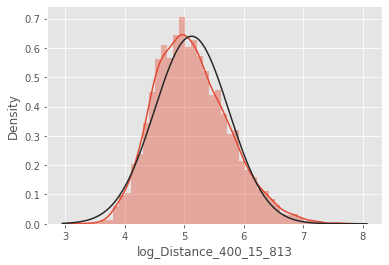

<Figure size 432x288 with 0 Axes>

In [5]:
from scipy.stats import norm
final_zone['log_Distance_400_15_813'] = np.log(final_zone['distance_400_15'])
sns.distplot(final_zone['log_Distance_400_15_813'],fit=norm)
fig = plt.figure()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


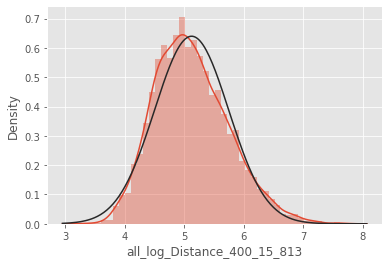

<Figure size 432x288 with 0 Axes>

In [6]:
from scipy.stats import norm
final_zone['all_log_Distance_400_15_813'] = np.log(final_zone['all_distance_15_400'])
sns.distplot(final_zone['all_log_Distance_400_15_813'],fit=norm)
fig = plt.figure()

In [7]:
# final_zone.to_csv('final/final_8_5.csv',index=False)

## Descriptive statistics

In [8]:
final_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LSOA11CD                             4835 non-null   object 
 1   all_routes_presence_400_15           4835 non-null   int64  
 2   all_routes_density_400_15            4835 non-null   float64
 3   all_distance_15_400                  4835 non-null   float64
 4   distance_400_15                      4835 non-null   float64
 5   routes_presence_400                  4835 non-null   int64  
 6   routes_density_400                   4835 non-null   float64
 7   IMD                                  4835 non-null   float64
 8   Commuters                            4835 non-null   float64
 9   persons_hec_13                       4835 non-null   int64  
 10  Mixed                                4835 non-null   float64
 11  Asian                         

In [9]:
final_zone2 = final_zone[final_zone.routes_presence_400== 1]
final_zone3 = final_zone[final_zone.routes_presence_400== 0]
final_zone4 = final_zone[final_zone.all_routes_presence_400_15== 1]
final_zone5 = final_zone[final_zone.all_routes_presence_400_15== 0]

In [10]:
final_zone['distance_400_15'].median()

158.2690322

In [11]:
final_zone['all_distance_15_400'].median()

158.2690322

In [12]:
final_zone['distance_400_15'].median()

158.2690322

In [13]:
final_zone['routes_density_400'].median()

0.0

In [14]:
final_zone['all_routes_density_400_15'].median()

0.0

In [15]:
final_zone[final_zone.routes_density_400 > 0]['routes_density_400'].median()

51.23934004

In [16]:
final_zone[final_zone['distance_400_15'] <= 158.2690322]['distance_400_15'].describe()

count                                 2,418.0000
mean                                    106.4020
std                                      29.1515
min                                      26.8888
25%                                      84.6545
50%                                     106.1407
75%                                     130.9297
max                                     158.2690
Name: distance_400_15, dtype: float64

In [17]:
final_zone[final_zone['distance_400_15'] > 158.2690322]['distance_400_15'].describe()

count                                 2,417.0000
mean                                    308.3853
std                                     185.9179
min                                     158.2857
25%                                     194.3468
50%                                     250.2866
75%                                     348.8712
max                                   2,257.8995
Name: distance_400_15, dtype: float64

In [18]:
final_zone[final_zone['all_distance_15_400'] <=  158.2690322]['all_distance_15_400'].describe()

count                                 2,418.0000
mean                                    106.4020
std                                      29.1515
min                                      26.8888
25%                                      84.6545
50%                                     106.1407
75%                                     130.9297
max                                     158.2690
Name: all_distance_15_400, dtype: float64

In [19]:
final_zone[final_zone['all_distance_15_400'] > 158.2690322]['all_distance_15_400'].describe()

count                                 2,417.0000
mean                                    308.3853
std                                     185.9179
min                                     158.2857
25%                                     194.3468
50%                                     250.2866
75%                                     348.8712
max                                   2,257.8995
Name: all_distance_15_400, dtype: float64

In [20]:
final_zone[['distance_400_15','all_routes_presence_400_15','all_routes_density_400_15',
            'all_distance_15_400','routes_presence_400','routes_density_400']].describe()

,distance_400_15,all_routes_presence_400_15,all_routes_density_400_15,all_distance_15_400,routes_presence_400,routes_density_400
count,"4,835.0000","4,835.0000","4,835.0000","4,835.0000","4,835.0000","4,835.0000"
mean,207.3728,0.2534,14.2689,207.3728,0.2143,11.7268
std,167.0387,0.4350,28.6721,167.0387,0.4104,26.2984
min,26.8888,0.0000,0.0000,26.8888,0.0000,0.0000
25%,106.1407,0.0000,0.0000,106.1407,0.0000,0.0000
50%,158.2690,0.0000,0.0000,158.2690,0.0000,0.0000
75%,250.2567,1.0000,3.8618,250.2567,0.0000,0.0000
max,"2,257.8995",1.0000,175.2553,"2,257.8995",1.0000,164.1973


In [21]:
final_zone[['IMD','Black','Asian','Other','age_abv_65',
            'level_4_abv','pop_den_area','Commuters']].describe()

,IMD,Black,Asian,Other,age_abv_65,level_4_abv,pop_den_area,Commuters
count,"4,835.0000","4,835.0000","4,835.0000","4,835.0000","4,835.0000","4,835.0000","4,835.0000","4,835.0000"
mean,21.4984,13.0530,17.9312,3.3810,11.7099,37.2925,95.9374,2.5517
std,10.9047,11.1856,16.1468,2.8188,5.1876,14.5424,61.2236,2.4901
min,2.3260,0.1000,0.8000,0.0000,0.5281,8.3000,1.2000,0.0000
25%,12.4465,4.3000,7.3000,1.5000,7.9960,25.8000,51.9500,0.7806
50%,20.3750,9.5000,12.0000,2.7000,10.7447,34.5000,83.3000,1.6057
75%,29.5975,18.9000,21.9000,4.5000,14.5882,47.5000,128.4000,3.6460
max,64.6770,63.7000,86.9000,36.6000,44.3966,83.8000,684.7000,18.7101


In [22]:
final_zone2[['distance_400_15','routes_presence_400','routes_density_400',
            'IMD','Black','Asian','Other','age_abv_65',
            'level_4_abv','pop_den_area','Commuters','no_car_hhd_2011']].describe()

,distance_400_15,routes_presence_400,routes_density_400,IMD,Black,Asian,Other,age_abv_65,level_4_abv,pop_den_area,Commuters,no_car_hhd_2011
count,"1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000","1,036.0000"
mean,122.5495,1.0000,54.7288,25.3539,15.9186,17.7826,4.4811,9.1227,41.6542,130.8305,3.7530,54.7141
std,66.4549,0.0000,29.5709,10.2065,11.7728,13.8313,3.3503,3.9460,14.7249,67.1002,2.8591,15.3973
min,26.8888,1.0000,0.9461,3.8040,0.2000,2.4000,0.2000,0.7683,14.5000,6.1000,0.0000,8.7000
25%,79.8692,1.0000,34.7809,17.3558,6.3000,8.7000,2.5000,6.5134,29.7000,82.2750,1.7277,44.8750
50%,104.4253,1.0000,51.2393,25.7645,13.0500,12.9000,3.6000,8.6268,39.7000,124.9500,3.0982,58.0000
75%,145.4212,1.0000,71.8283,32.8792,23.5000,22.2250,5.4000,11.1908,53.3000,169.2250,4.8323,67.2250
max,529.5965,1.0000,164.1973,59.0090,61.3000,84.1000,36.6000,44.3966,83.8000,463.2000,18.7101,86.3000


In [23]:
final_zone3[['distance_400_15','routes_presence_400','routes_density_400',
            'IMD','Black','Asian','Other','age_abv_65',
            'level_4_abv','pop_den_area','Commuters','no_car_hhd_2011']].describe()

,distance_400_15,routes_presence_400,routes_density_400,IMD,Black,Asian,Other,age_abv_65,level_4_abv,pop_den_area,Commuters,no_car_hhd_2011
count,"3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000","3,799.0000"
mean,230.5044,0.0000,0.0000,20.4470,12.2716,17.9717,3.0810,12.4154,36.1031,86.4220,2.2241,36.0197
std,178.3579,0.0000,0.0000,10.8536,10.8915,16.7241,2.5756,5.2616,14.2646,55.8671,2.2723,17.2327
min,39.5718,0.0000,0.0000,2.3260,0.1000,0.8000,0.0000,0.5281,8.3000,1.2000,0.0000,2.7000
25%,121.7811,0.0000,0.0000,11.3560,4.0000,6.9000,1.3000,8.5016,25.0000,47.9500,0.6902,21.8000
50%,178.5034,0.0000,0.0000,18.9070,8.6000,11.7000,2.5000,11.4787,33.1000,75.0000,1.2801,34.2000
75%,277.2886,0.0000,0.0000,28.3395,17.4000,21.8000,4.1000,15.4203,45.6000,114.1000,3.0251,49.2000
max,"2,257.8995",0.0000,0.0000,64.6770,63.7000,86.9000,25.7000,39.1753,75.4000,684.7000,16.7109,82.6000


In [24]:
final_zone4[['all_distance_15_400','all_routes_presence_400_15','all_routes_density_400_15',
            'IMD','Black','Asian','Other','age_abv_65',
            'level_4_abv','pop_den_area','Commuters','no_car_hhd_2011']].describe()

,all_distance_15_400,all_routes_presence_400_15,all_routes_density_400_15,IMD,Black,Asian,Other,age_abv_65,level_4_abv,pop_den_area,Commuters,no_car_hhd_2011
count,"1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000","1,225.0000"
mean,122.5657,1.0000,56.3186,25.3275,16.2301,17.2783,4.3313,9.1847,42.1226,130.3902,3.8946,54.6998
std,65.3120,0.0000,29.6077,10.3392,12.2521,14.0211,3.2155,3.9745,14.7326,65.5791,2.9017,15.2062
min,26.8888,1.0000,0.9461,2.6660,0.1000,2.4000,0.2000,0.5281,14.5000,6.1000,0.0000,8.7000
25%,78.9761,1.0000,36.2121,17.0970,6.2000,8.4000,2.4000,6.5308,30.0000,82.4000,1.7992,44.9000
50%,105.0335,1.0000,53.5236,25.7110,13.1000,12.5000,3.5000,8.6556,40.2000,125.9000,3.3088,58.1000
75%,146.2238,1.0000,74.3241,33.1920,23.9000,21.0000,5.2000,11.2010,54.1000,168.1000,5.0676,66.9000
max,529.5965,1.0000,175.2553,59.0090,63.7000,84.1000,36.6000,44.3966,83.8000,463.2000,18.7101,86.3000


In [25]:
final_zone5[['all_distance_15_400','all_routes_presence_400_15','all_routes_density_400_15',
            'IMD','Black','Asian','Other','age_abv_65',
            'level_4_abv','pop_den_area','Commuters','no_car_hhd_2011']].describe()

,all_distance_15_400,all_routes_presence_400_15,all_routes_density_400_15,IMD,Black,Asian,Other,age_abv_65,level_4_abv,pop_den_area,Commuters,no_car_hhd_2011
count,"3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000","3,610.0000"
mean,236.1508,0.0000,0.0000,20.1991,11.9749,18.1528,3.0585,12.5668,35.6535,84.2464,2.0960,35.0458
std,180.7105,0.0000,0.0000,10.7868,10.5870,16.8032,2.5933,5.2715,14.1084,54.9767,2.1516,16.8231
min,39.5718,0.0000,0.0000,2.3260,0.1000,0.8000,0.0000,0.5362,8.3000,1.2000,0.0000,2.7000
25%,125.8400,0.0000,0.0000,11.2110,3.9000,6.9000,1.3000,8.6653,24.8000,47.0250,0.6797,21.3000
50%,183.6598,0.0000,0.0000,18.6235,8.5000,11.9000,2.4000,11.6373,32.7000,72.8000,1.2181,33.0500
75%,284.5769,0.0000,0.0000,27.9808,17.0000,22.2750,4.1000,15.5732,44.8000,109.6750,2.7743,47.4000
max,"2,257.8995",0.0000,0.0000,64.6770,59.0000,86.9000,25.7000,39.1753,74.9000,684.7000,16.7109,82.6000


## VIF

In [26]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [27]:
final_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LSOA11CD                             4835 non-null   object 
 1   all_routes_presence_400_15           4835 non-null   int64  
 2   all_routes_density_400_15            4835 non-null   float64
 3   all_distance_15_400                  4835 non-null   float64
 4   distance_400_15                      4835 non-null   float64
 5   routes_presence_400                  4835 non-null   int64  
 6   routes_density_400                   4835 non-null   float64
 7   IMD                                  4835 non-null   float64
 8   Commuters                            4835 non-null   float64
 9   persons_hec_13                       4835 non-null   int64  
 10  Mixed                                4835 non-null   float64
 11  Asian                         

In [28]:
# calculate VIF for dataset final_zonehttps://censusgis.wordpress.com/
# drop variable with the largest VIF
final_zone_new = drop_column_using_vif_(final_zone[['IMD','level_4_abv','Black','Asian','Other','age_abv_65','Commuters','pop_den_area']])
# check to see the variables left
final_zone_new.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,IMD,level_4_abv,Black,Asian,Other,age_abv_65,Commuters,pop_den_area
0,6.2080,77.6000,0.8000,8.7000,2.3000,22.6594,3.8493,112.9000
1,5.1430,79.2000,0.3000,6.6000,0.6000,21.3746,4.7659,62.9000
2,19.4020,56.8000,3.3000,12.5000,1.7000,20.2653,6.3521,227.7000
3,28.6520,34.5000,10.2000,27.8000,4.7000,12.7133,4.3984,52.0000
4,19.8370,32.9000,10.4000,50.6000,2.9000,7.8180,0.5596,116.2000


## Data exploration

In [29]:
presence_buff_0 = len(final_zone[final_zone['routes_presence_400']==0])
presence_buff_1 = len(final_zone[final_zone['routes_presence_400']==1])

pct_of_presence_buff_0 = presence_buff_0/(presence_buff_0+presence_buff_1)
print("percentage of LSOAs have no presence of open cycle route", pct_of_presence_buff_0*100)

pct_of_presence_buff_1 = presence_buff_1/(presence_buff_0+presence_buff_1)
print("percentage of LSOAs have presence of open cycle route", pct_of_presence_buff_1*100)

percentage of LSOAs have no presence of open cycle route 78.57290589451912
percentage of LSOAs have presence of open cycle route 21.42709410548087


In [30]:
presence_buff_0 = len(final_zone[final_zone['all_routes_presence_400_15']==0])
presence_buff_1 = len(final_zone[final_zone['all_routes_presence_400_15']==1])

pct_of_presence_buff_0 = presence_buff_0/(presence_buff_0+presence_buff_1)
print("percentage of LSOAs have no presence of open cycle route", pct_of_presence_buff_0*100)

pct_of_presence_buff_1 = presence_buff_1/(presence_buff_0+presence_buff_1)
print("percentage of LSOAs have presence of open cycle route", pct_of_presence_buff_1*100)

percentage of LSOAs have no presence of open cycle route 74.66390899689762
percentage of LSOAs have presence of open cycle route 25.33609100310238


## Logistic

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.api import add_constant

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from linearmodels import PooledOLS
from linearmodels import PanelOLS
from linearmodels import RandomEffects

from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
y_data = final_zone['routes_presence_400']
x_data = final_zone[['IMD','Black','Asian','Other','age_abv_65','Commuters','pop_den_area','level_4_abv']]

model = sm.Logit(y_data, x_data)
model_fit = model.fit()

# print result
model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.452435
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     routes_presence_400   No. Observations:                 4835
Model:                           Logit   Df Residuals:                     4827
Method:                            MLE   Df Model:                            7
Date:                 Mon, 22 Aug 2022   Pseudo R-squ.:                  0.1292
Time:                         14:25:13   Log-Likelihood:                -2187.5
converged:                        True   LL-Null:                       -2512.1
Covariance Type:             nonrobust   LLR p-value:                6.434e-136
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
IMD              0.0088      0.005      1.734      0.083      -0.001       0.019
Black           -0.0201      0.005     -4.277      0.000      -0.029      -0.011
Asian           -0.0112      0.003     -4.273      0.000      -0.016      -0.006
Other            0.1025      0.014      7.482      0.000       0.076       0.129
age_abv_65      -0.1735      0.009    -19.918      0.000      -0.191      -0.156
Commuters        0.0986      0.019      5.063      0.000       0.060       0.137
pop_den_area     0.0035      0.001      5.131      0.000       0.002       0.005
level_4_abv     -0.0054      0.003     -1.886      0.059      -0.011       0.000
================================================================================
"""

In [33]:
# y_data = final_zone['routes_presence_400']
# x_data = final_zone[['IMD','Black','Asian','Other',
#             'pop_den_area','Commuters','age_abv_65','no_car_hhd_2011']]

# model = sm.Logit(y_data, x_data)
# model_fit = model.fit()

# # print result
# model_fit.summary()

In [34]:
params = model_fit.params
conf = model_fit.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                                                   5%  \
IMD                                            0.9989   
Black                                          0.9711   
Asian                                          0.9838   
Other                                          1.0786   
age_abv_65                                     0.8265   
Commuters                                      1.0623   
pop_den_area                                   1.0022   
level_4_abv                                    0.9890   

                                                  95%  \
IMD                                            1.0189   
Black                                          0.9892   
Asian                                          0.9940   
Other                                          1.1382   
age_abv_65                                     0.8552   
Commuters                                      1.1465   
pop_den_area                                   1.0049   
level_4_abv                   

In [35]:
# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
# check if pvalues are significant
odds['pvalues'] = model_fit.pvalues
odds['significant?'] = ['significant' if pval <= 0.1 else 'not significant' for pval in model_fit.pvalues]
odds

,5%,95%,Odds Ratio,pvalues,significant?
IMD,0.9989,1.0189,1.0088,0.0828,significant
Black,0.9711,0.9892,0.9801,0.0000,significant
Asian,0.9838,0.9940,0.9889,0.0000,significant
Other,1.0786,1.1382,1.1080,0.0000,significant
age_abv_65,0.8265,0.8552,0.8408,0.0000,significant
Commuters,1.0623,1.1465,1.1036,0.0000,significant
pop_den_area,1.0022,1.0049,1.0035,0.0000,significant
level_4_abv,0.9890,1.0002,0.9946,0.0593,significant


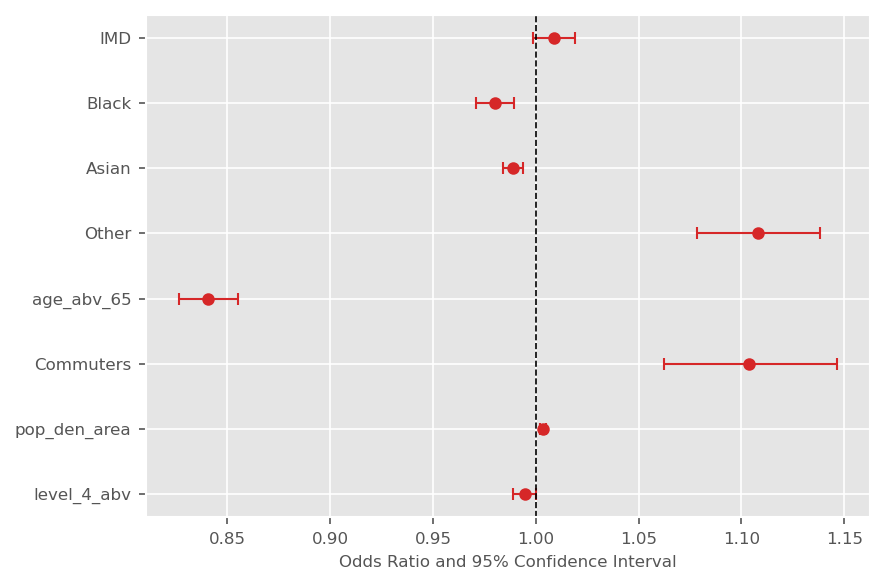

In [36]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 4), dpi=150)
for idx, row in odds.iloc[::-1].iterrows():
    ci = [[row['Odds Ratio'] - row[::-1]['5%']], [row['95%'] - row['Odds Ratio']]]
    if row['significant?'] == 'significant':
        plt.errorbar(x=[row['Odds Ratio']], y=[row.name], xerr=ci,
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['Odds Ratio']], y=[row.name], xerr=ci,
            ecolor='tab:gray', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:gray", mec="tab:gray")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
plt.savefig('open_forest_plot.png')
plt.show()

In [37]:
y_data = final_zone['all_routes_presence_400_15']
x_data = final_zone[['IMD','Black','Asian','Other','age_abv_65','Commuters','pop_den_area','level_4_abv']]

model = sm.Logit(y_data, x_data)
model_fit = model.fit()

# print result
model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.481366
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     all_routes_presence_400_15   No. Observations:                 4835
Model:                                  Logit   Df Residuals:                     4827
Method:                                   MLE   Df Model:                            7
Date:                        Mon, 22 Aug 2022   Pseudo R-squ.:                  0.1495
Time:                                14:25:13   Log-Likelihood:                -2327.4
converged:                               True   LL-Null:                       -2736.6
Covariance Type:                    nonrobust   LLR p-value:                2.001e-172
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
IMD              0.0077      0.005      1.585      0.113      -0.002       0.017
Black           -0.0131      0.004     -2.928      0.003      -0.022      -0.004
Asian           -0.0112      0.003     -4.403      0.000      -0.016      -0.006
Other            0.0895      0.013      6.668      0.000       0.063       0.116
age_abv_65      -0.1689      0.008    -20.377      0.000      -0.185      -0.153
Commuters        0.1456      0.020      7.313      0.000       0.107       0.185
pop_den_area     0.0035      0.001      5.243      0.000       0.002       0.005
level_4_abv     -0.0043      0.003     -1.512      0.130      -0.010       0.001
================================================================================
"""

In [38]:
params = model_fit.params
conf = model_fit.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))
# check if pvalues are significant
odds['pvalues'] = model_fit.pvalues
odds['significant?'] = ['significant' if pval <= 0.1 else 'not significant' for pval in model_fit.pvalues]
odds

                                                   5%  \
IMD                                            0.9982   
Black                                          0.9784   
Asian                                          0.9840   
Other                                          1.0652   
age_abv_65                                     0.8310   
Commuters                                      1.1125   
pop_den_area                                   1.0022   
level_4_abv                                    0.9903   

                                                  95%  \
IMD                                            1.0174   
Black                                          0.9957   
Asian                                          0.9938   
Other                                          1.1228   
age_abv_65                                     0.8584   
Commuters                                      1.2027   
pop_den_area                                   1.0049   
level_4_abv                   

,5%,95%,Odds Ratio,pvalues,significant?
IMD,0.9982,1.0174,1.0077,0.1129,not significant
Black,0.9784,0.9957,0.9870,0.0034,significant
Asian,0.9840,0.9938,0.9889,0.0000,significant
Other,1.0652,1.1228,1.0936,0.0000,significant
age_abv_65,0.8310,0.8584,0.8446,0.0000,significant
Commuters,1.1125,1.2027,1.1567,0.0000,significant
pop_den_area,1.0022,1.0049,1.0035,0.0000,significant
level_4_abv,0.9903,1.0013,0.9957,0.1305,not significant


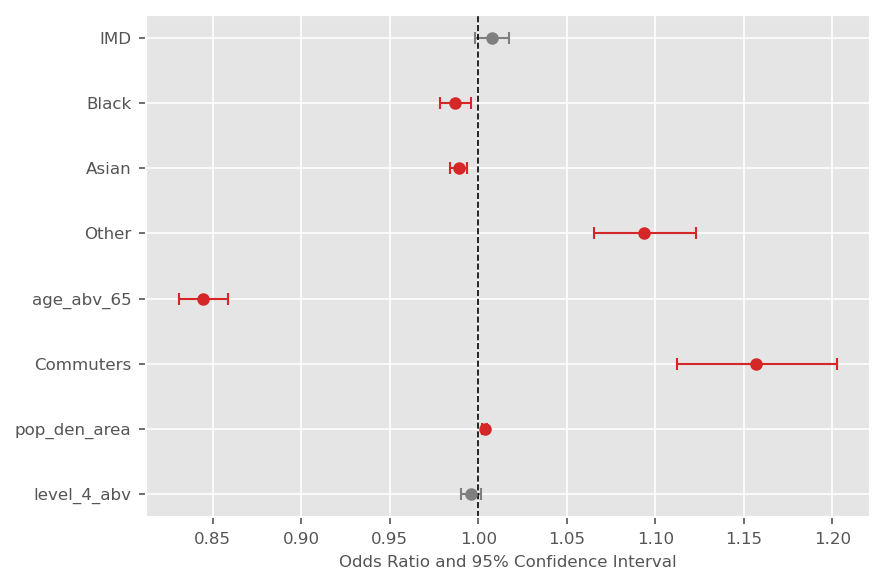

In [39]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 4), dpi=150)
for idx, row in odds.iloc[::-1].iterrows():
    ci = [[row['Odds Ratio'] - row[::-1]['5%']], [row['95%'] - row['Odds Ratio']]]
    if row['significant?'] == 'significant':
        plt.errorbar(x=[row['Odds Ratio']], y=[row.name], xerr=ci,
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['Odds Ratio']], y=[row.name], xerr=ci,
            ecolor='tab:gray', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:gray", mec="tab:gray")
plt.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Odds Ratio and 95% Confidence Interval', fontsize=8)
plt.tight_layout()
plt.savefig('all_forest_plot.png')
plt.show()

## OLS

# 1 distance_points

In [40]:
# Import required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from mgwr.utils import shift_colormap, truncate_colormap

import libpysal as ps
import sklearn.cluster as sklc
import sklearn.metrics as sklm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

In [41]:
final_zone2 = final_zone[final_zone.routes_presence_400== 1]

In [42]:
final_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LSOA11CD                             4835 non-null   object 
 1   all_routes_presence_400_15           4835 non-null   int64  
 2   all_routes_density_400_15            4835 non-null   float64
 3   all_distance_15_400                  4835 non-null   float64
 4   distance_400_15                      4835 non-null   float64
 5   routes_presence_400                  4835 non-null   int64  
 6   routes_density_400                   4835 non-null   float64
 7   IMD                                  4835 non-null   float64
 8   Commuters                            4835 non-null   float64
 9   persons_hec_13                       4835 non-null   int64  
 10  Mixed                                4835 non-null   float64
 11  Asian                         

# Distance

In [43]:
# fit ols model
reg = sm.ols(formula="all_log_Distance_400_15_813 ~ IMD + level_4_abv + Black+ Asian + Other +pop_den_area+ Commuters + age_abv_65 ", data = final_zone).fit()
# print the result\
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:     all_log_Distance_400_15_813   R-squared:                       0.339
Model:                                     OLS   Adj. R-squared:                  0.338
Method:                          Least Squares   F-statistic:                     309.5
Date:                         Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                                 14:25:13   Log-Likelihood:                -3573.9
No. Observations:                         4835   AIC:                             7166.
Df Residuals:                             4826   BIC:                             7224.
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [44]:
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(reg.resid,  reg.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 378.3774212921748, 'Test Statistic p-value': 9.854234349737377e-55, 'F-Statistic': 9.242771016006712, 'F-Test p-value': 2.2358642544259412e-57}


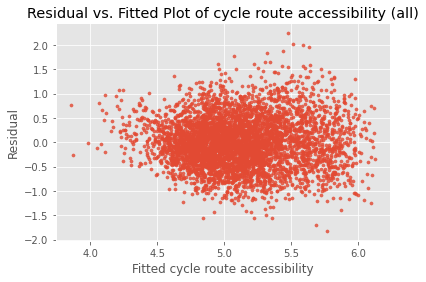

In [45]:
# plot 
plt.scatter(reg.fittedvalues, reg.resid,alpha=0.8,s=10
        )
# adding title and labels
plt.xlabel('Fitted cycle route accessibility')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of cycle route accessibility (all)')
plt.savefig('all_distance_residual.png')
plt.show()

<AxesSubplot:ylabel='Count'>

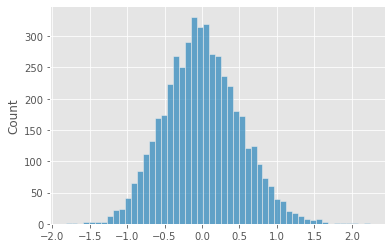

In [46]:
# add residuals info to London MSOAs data
final_zone['ols_resid_Density'] = reg.resid
# plot to check the distribution of residuals
sns.histplot(reg.resid)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


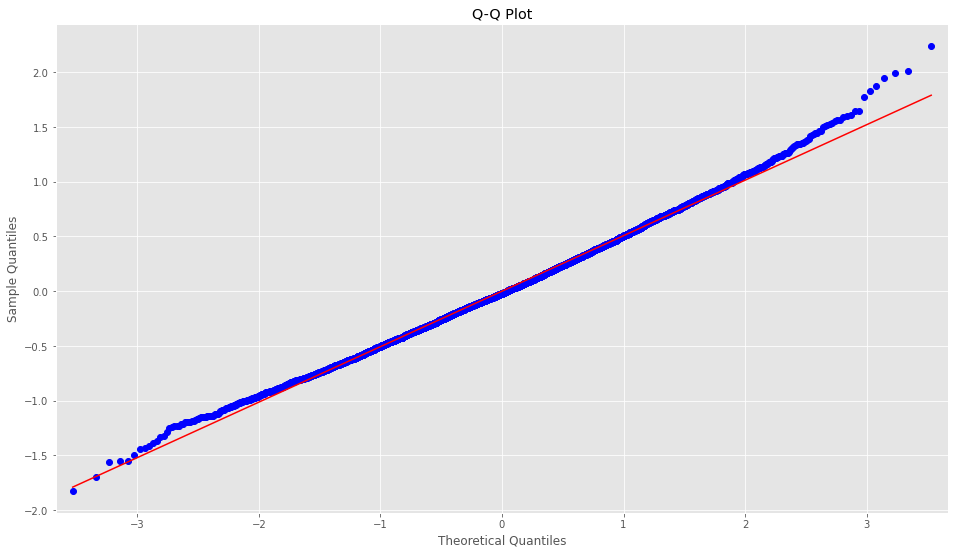

In [47]:
import scipy.stats as stats
import statsmodels.api as sm
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(reg.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")
plt.savefig('all_qq.png')

In [49]:
# Import required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from mgwr.utils import shift_colormap, truncate_colormap

import libpysal as ps
import sklearn.cluster as sklc
import sklearn.metrics as sklm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

In [50]:
# fit ols model
reg = sm.ols(formula="log_Distance_400_15_813 ~ IMD+ level_4_abv + Black+ Asian + Other +pop_den_area+ Commuters + age_abv_65 ", data = final_zone).fit()
# print the result\
print(reg.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Distance_400_15_813   R-squared:                       0.339
Model:                                 OLS   Adj. R-squared:                  0.338
Method:                      Least Squares   F-statistic:                     309.5
Date:                     Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                             15:12:31   Log-Likelihood:                -3573.9
No. Observations:                     4835   AIC:                             7166.
Df Residuals:                         4826   BIC:                             7224.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [51]:
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(reg.resid,  reg.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 378.3774212921748, 'Test Statistic p-value': 9.854234349737377e-55, 'F-Statistic': 9.242771016006712, 'F-Test p-value': 2.2358642544259412e-57}


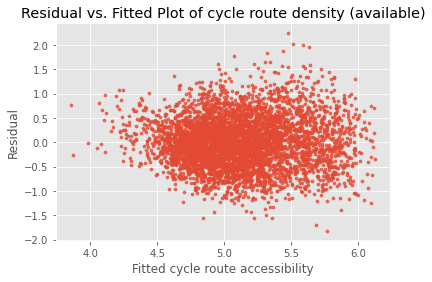

In [52]:
# plot 
plt.scatter(reg.fittedvalues, reg.resid,alpha=0.8,s=10
        )
# adding title and labels
plt.xlabel('Fitted cycle route accessibility')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of cycle route density (available)')
plt.savefig('open_distance_residual.png')
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


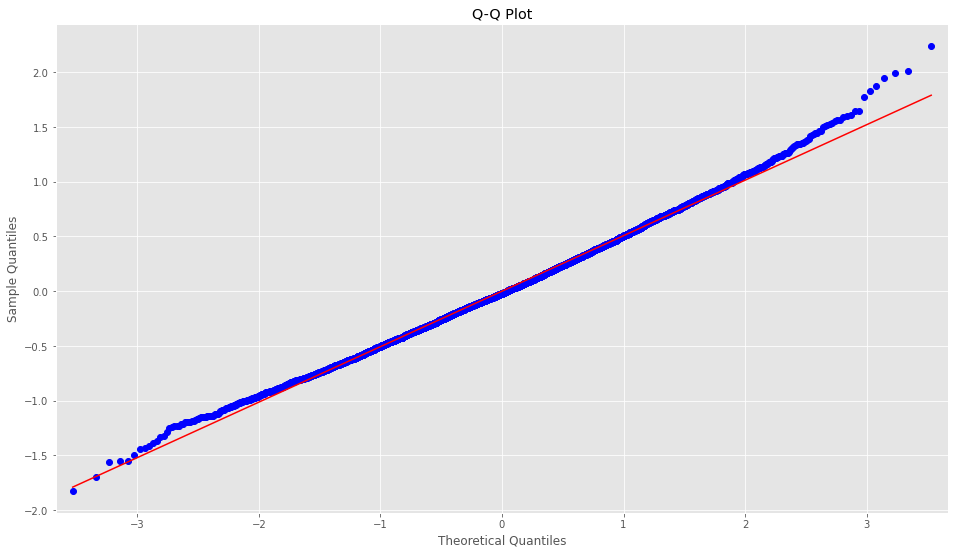

In [54]:
import scipy.stats as stats
import statsmodels.api as sm
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(reg.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot for model 6")
plt.savefig('m6_qq.png')

<AxesSubplot:ylabel='Count'>

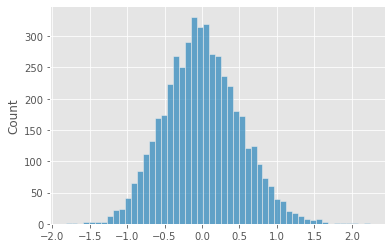

In [53]:
# add residuals info to London MSOAs data
final_zone['ols_resid_Density'] = reg.resid
# plot to check the distribution of residuals
sns.histplot(reg.resid)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


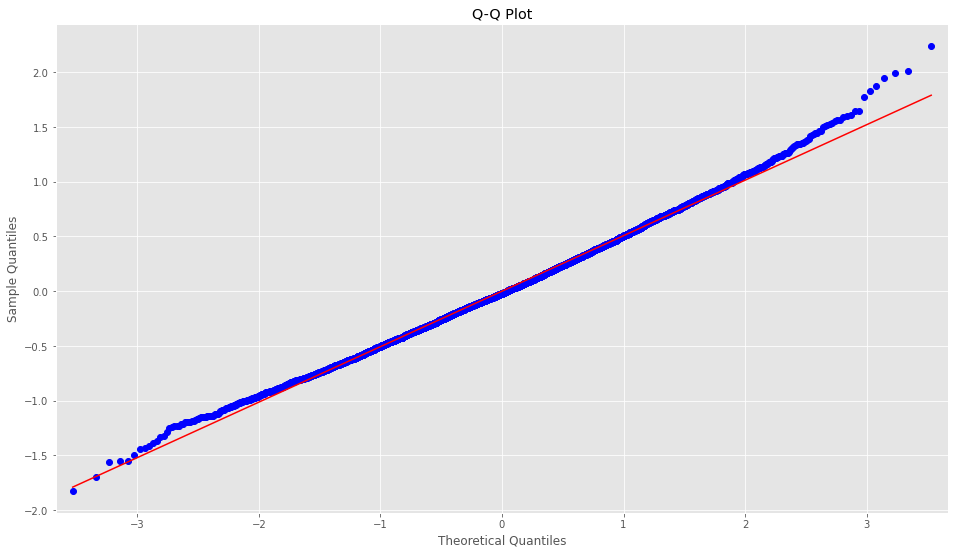

In [54]:
import scipy.stats as stats
import statsmodels.api as sm
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(reg.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot for model 3")
plt.savefig('m3_qq.png')

# 400 density

In [55]:
# Import required packages
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from mgwr.utils import shift_colormap, truncate_colormap

import libpysal as ps
import sklearn.cluster as sklc
import sklearn.metrics as sklm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

In [56]:
# fit ols model
reg = sm.ols(formula="all_routes_density_400_15 ~ IMD+ level_4_abv + Black+ Asian + Other +pop_den_area+ Commuters + age_abv_65 ", data = final_zone2).fit()
# print the result\
print(reg.summary())

                                OLS Regression Results                               
Dep. Variable:     all_routes_density_400_15   R-squared:                       0.025
Model:                                   OLS   Adj. R-squared:                  0.017
Method:                        Least Squares   F-statistic:                     3.282
Date:                       Mon, 22 Aug 2022   Prob (F-statistic):            0.00105
Time:                               15:12:34   Log-Likelihood:                -4972.2
No. Observations:                       1036   AIC:                             9962.
Df Residuals:                           1027   BIC:                         1.001e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

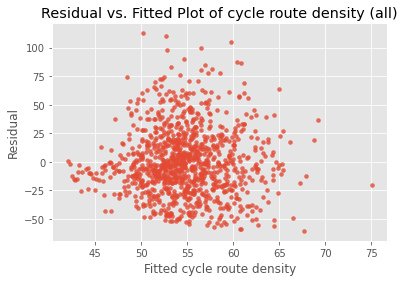

In [68]:
# plot 
plt.scatter(reg.fittedvalues, reg.resid,alpha=0.8,s=15
        )
# adding title and labels
plt.xlabel('Fitted cycle route density')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of cycle route density (all)')
plt.savefig('all_density_residual.png')
plt.show()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q Plot')

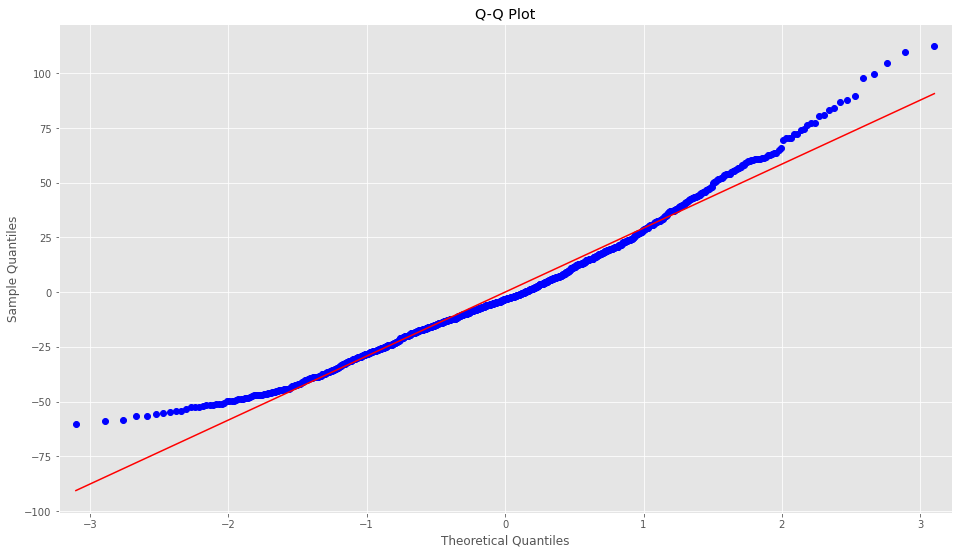

In [63]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(reg.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot for model 5")

In [58]:
# fit ols model
reg = sm.ols(formula="routes_density_400 ~ IMD+ level_4_abv + Black+ Asian + Other +pop_den_area+ Commuters + age_abv_65 ", data = final_zone2).fit()
# print the result\
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:     routes_density_400   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.849
Date:                Mon, 22 Aug 2022   Prob (F-statistic):            0.00390
Time:                        15:12:34   Log-Likelihood:                -4966.9
No. Observations:                1036   AIC:                             9952.
Df Residuals:                    1027   BIC:                             9996.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       64.3849     10.228      6.295   

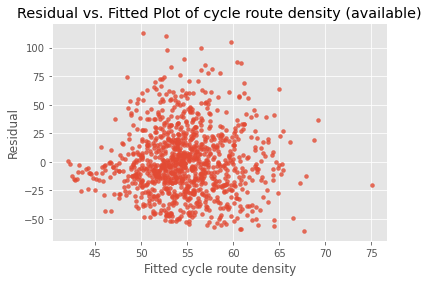

In [59]:
# plot 
plt.scatter(reg.fittedvalues, reg.resid,alpha=0.8,s=15
        )
# adding title and labels
plt.xlabel('Fitted cycle route density')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of cycle route density (available)')
plt.savefig('open_density_residual.png')
plt.show()

<AxesSubplot:ylabel='Count'>

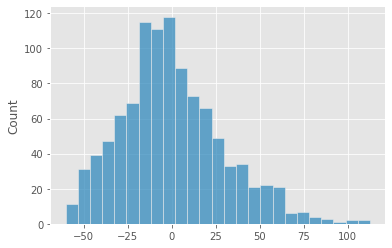

In [60]:
# add residuals info to London MSOAs data
final_zone['ols_resid_Density'] = reg.resid
# plot to check the distribution of residuals
sns.histplot(reg.resid)

In [61]:
import scipy.stats as stats
import statsmodels.api as sm

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

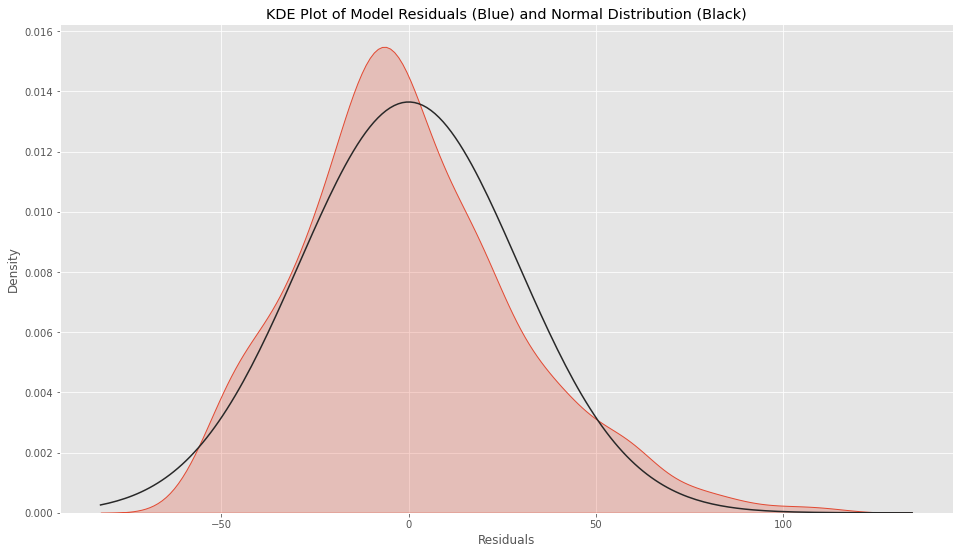

In [62]:
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(reg.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q Plot')

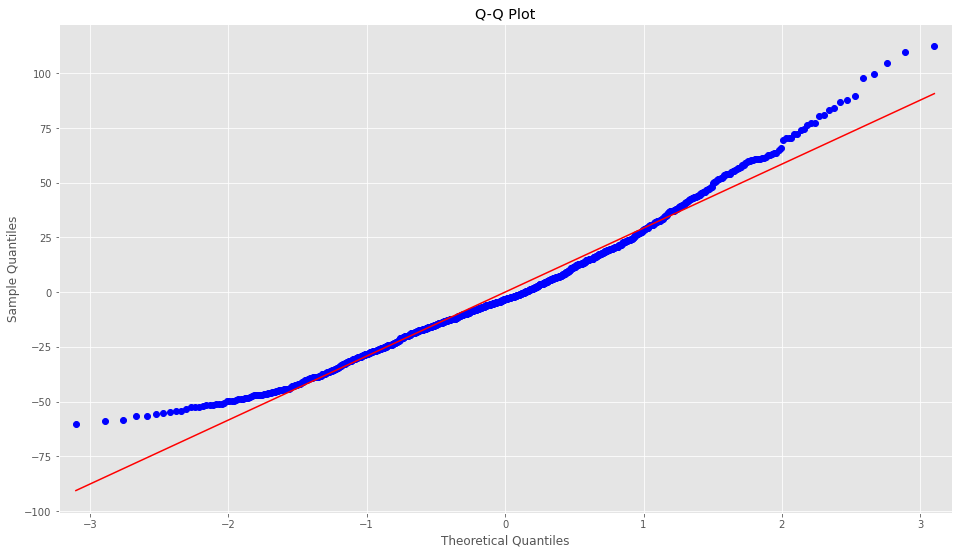

In [63]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(reg.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot for model 2")

## independent t test

In [64]:
!pip install researchpy

In [65]:
final_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LSOA11CD                             4835 non-null   object 
 1   all_routes_presence_400_15           4835 non-null   int64  
 2   all_routes_density_400_15            4835 non-null   float64
 3   all_distance_15_400                  4835 non-null   float64
 4   distance_400_15                      4835 non-null   float64
 5   routes_presence_400                  4835 non-null   int64  
 6   routes_density_400                   4835 non-null   float64
 7   IMD                                  4835 non-null   float64
 8   Commuters                            4835 non-null   float64
 9   persons_hec_13                       4835 non-null   int64  
 10  Mixed                                4835 non-null   float64
 11  Asian                         

In [66]:
import researchpy as rp
import scipy.stats as stats

In [ ]:
rp.ttest(group1= final_zone['age_abv_65'][final_zone['routes_density_400'] >= 51.23934004], group1_name= "density>=median",
         group2= final_zone['age_abv_65'][final_zone['routes_density_400'] < 51.23934004], group2_name= "density<median")

In [ ]:
rp.ttest(group1= final_zone['IMD'][final_zone['routes_density_400'] >= 51.23934004], group1_name= "density>=median",
         group2= final_zone['IMD'][final_zone['routes_density_400'] < 51.23934004], group2_name= "density<median")

In [ ]:
rp.ttest(group1= final_zone['Black'][final_zone['routes_density_400'] >= 51.23934004], group1_name= "density>=median",
         group2= final_zone['Black'][final_zone['routes_density_400'] < 51.23934004], group2_name= "density<median")

In [ ]:
rp.ttest(group1= final_zone['Asian'][final_zone['routes_density_400'] >= 51.23934004], group1_name= "density>=median",
         group2= final_zone['Asian'][final_zone['routes_density_400'] < 51.23934004], group2_name= "density<median")

In [ ]:
rp.ttest(group1= final_zone['Other'][final_zone['routes_density_400'] >= 51.23934004], group1_name= "density>=median",
         group2= final_zone['Other'][final_zone['routes_density_400'] < 51.23934004], group2_name= "density<median")

In [ ]:
rp.ttest(group1= final_zone['level_4_abv'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['level_4_abv'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['level_4_abv'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['level_4_abv'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['IMD'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['IMD'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['IMD'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['IMD'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Commuters'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['Commuters'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Commuters'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['Commuters'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Black'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['Black'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Black'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['Black'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Asian'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['Asian'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Asian'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['Asian'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Other'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['Other'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['Other'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['Other'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['pop_den_area'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['pop_den_area'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['pop_den_area'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['pop_den_area'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['age_abv_65'][final_zone['all_routes_presence_400_15'] == 0], group1_name= "non-exist",
         group2= final_zone['age_abv_65'][final_zone['all_routes_presence_400_15'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['age_abv_65'][final_zone['routes_presence_400'] == 0], group1_name= "non-exist",
         group2= final_zone['age_abv_65'][final_zone['routes_presence_400'] == 1], group2_name= "exist")

In [ ]:
rp.ttest(group1= final_zone['no_car_hhd_2011'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['no_car_hhd_2011'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['no_car_hhd_2011'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['no_car_hhd_2011'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['age_abv_65'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['age_abv_65'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['age_abv_65'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['age_abv_65'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['level_4_abv'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['level_4_abv'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['level_4_abv'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['level_4_abv'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['IMD'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['IMD'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['IMD'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['IMD'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Black'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Black'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Black'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Black'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Asian'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Asian'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Asian'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Asian'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Other'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Other'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Other'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Other'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['pop_den_area'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['pop_den_area'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['pop_den_area'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['pop_den_area'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Commuters'][final_zone['all_distance_15_400'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Commuters'][final_zone['all_distance_15_400'] > 158.2690322], group2_name= ">median")

In [ ]:
rp.ttest(group1= final_zone['Commuters'][final_zone['distance_400_15'] <= 158.2690322], group1_name= "<=median",
         group2= final_zone['Commuters'][final_zone['distance_400_15'] > 158.2690322], group2_name= ">median")

## pairwise correlation

In [ ]:
p_cor = final_zone[['IMD','Black','Asian','Other','Median_Income',
            'persons_hec_13','Commuters','age_abv_65','Transport_Accessibility']]

In [ ]:
pearsoncorr = p_cor.corr(method='pearson')
pearsoncorr

In [ ]:
#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. 
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
#plt.savefig('pearsoncorr.png')

In [ ]:
 import scipy.stats

In [ ]:
final_zone.info()

In [ ]:
scipy.stats.pearsonr(final_zone[final_zone['routes_presence_400'] > 0]['IMD'], final_zone[final_zone['routes_presence_400'] > 0]['routes_presence_400'])